<a href="https://colab.research.google.com/github/kiradoll/pythonbasicclass/blob/main/Python_Basicclass_Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests  # 크롤링을 위해 인터넷 페이지 요청

In [2]:
!pip install BeautifulSoup4   # 필요한 내용 추출 모듈

응답코드:200
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="러시아 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'러시아'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'러시아'의 네이버 통합검색 결과입니다."> <title>러시아 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220303.css"> <link rel="stylesheet" type="text/css" 
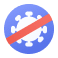
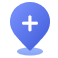
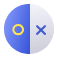
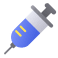
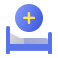

In [6]:
import requests
url = 'http://search.naver.com/search.naver'
param = {'query':'러시아'}
response = requests.get(url,params=param)
print('응답코드:{}'.format(response.status_code))
print(response.text)

In [7]:
import requests
url = 'http://music.bugs.co.kr/chart'
response = requests.get(url,params=param)
print(response.text)

<!DOCTYPE html>
<html lang="ko">
<head>
	<!-- bgsweb-www912 -->
	<meta charset="utf-8">
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta name="keywords" content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" />

<script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g_urlMe = "

In [8]:
import requests
from bs4 import BeautifulSoup as bs

url = 'https://music.bugs.co.kr/chart'

response = requests.get(url)

soup = bs(response.text)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

url = 'https://music.bugs.co.kr/chart'

response = requests.get(url)

soup = bs(response.text)

In [ ]:
len(soup.select('tr'))  # tr 태그들을 전부 선택

In [12]:
len(soup.select('tbody > tr'))

103

In [13]:
len(soup.select('table.byChart > tbody > tr'))

100

In [15]:
songs = soup.select('table.byChart > tbody > tr')

In [19]:
song = songs[0]

In [22]:
len(song.select('p > a'))

2

In [23]:
song.select('p > a')

[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6150789',true);
 " title="TOMBOY">TOMBOY</a>,
 <a href="https://music.bugs.co.kr/artist/20056456?wl_ref=list_tr_10_chart" onclick="
 " title="(여자)아이들">(여자)아이들</a>]

In [31]:
title = song.select('p.title > a')[0].text
title

'TOMBOY'

In [33]:
singer = song.select('p.artist > a')[0].text
singer

'(여자)아이들'

In [37]:
album = song.select('td.left > a')[0].text
album

'I NEVER DIE'

In [40]:
rank = song.select('div.ranking > strong')[0].text
rank

'1'

In [42]:
song_data = []

songs = soup.select('table.byChart > tbody > tr')

for song in songs:
  title = song.select('p.title > a')[0].text
  singer = song.select('p.artist > a')[0].text
  album = song.select('td.left > a')[0].text
  rank = song.select('div.ranking > strong')[0].text

  song_data.append([rank, title, singer, album])

song_data

[['1', 'TOMBOY', '(여자)아이들', 'I NEVER DIE'],
 ['2', 'GANADARA (Feat. 아이유)', '박재범', 'GANADARA'],
 ['3', 'Thank You', '브레이브걸스(Brave Girls)', 'THANK YOU'],
 ['4', '말리지 마', '(여자)아이들', 'I NEVER DIE'],
 ['5', 'VILLAIN DIES', '(여자)아이들', 'I NEVER DIE'],
 ['6', '사랑인가 봐', '멜로망스(MeloMance)', '사랑인가 봐 (사내맞선 OST 스페셜 트랙)'],
 ['7', '우린 어떠한 별보다 빛날 거야', '이하이', '우린 어떠한 별보다 빛날 거야 (이하이 X soundtrack#1)'],
 ['8', 'BORN TO LOVE YOU', '강승윤', 'BORN TO LOVE YOU'],
 ['9', 'INVU', '태연 (TAEYEON)', 'INVU - The 3rd Album'],
 ['10', 'ESCAPE', '(여자)아이들', 'I NEVER DIE'],
 ['11', 'LIAR', '(여자)아이들', 'I NEVER DIE'],
 ['12', 'ALREADY', '(여자)아이들', 'I NEVER DIE'],
 ['13', 'MY BAG', '(여자)아이들', 'I NEVER DIE'],
 ['14', 'POLAROID', '(여자)아이들', 'I NEVER DIE'],
 ['15', '듣고 싶을까', 'MSG워너비(M.O.M)', '듣고 싶을까'],
 ['16', 'RUN2U', 'STAYC(스테이씨)', 'YOUNG-LUV.COM'],
 ['17', '존재만으로', '원슈타인', '스물다섯 스물하나 OST Part 4'],
 ['18', '우리끼리 (You and I)', '브레이브걸스(Brave Girls)', 'THANK YOU'],
 ['19', 'SMILEY (Feat. BIBI)', 'YENA (최예나)', 'ˣ‿ˣ (SMiLEY)'],
 ['2